**Datasets**: Fer2013 and FER2013-Updated(Kaggle Datasets)

<span style="color:#fc0339;font-weight:bold;font-size:15px">Bundan sonraki bütün açıklamalar Türkçe olacaktır(başlıklar hariç). Bu Jupyter Notebook dosyası Turkcell Zeka Gücü Yapay Zeka Maratonu kapsamında hazırlanan bir projenin bir parçasıdır.</span>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/Colab Notebooks/"

In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks/Indian Bird Data/"

/content/drive/MyDrive/Colab Notebooks/Indian Bird Data


In [4]:
!kaggle datasets download -d msambare/fer2013
!kaggle datasets download -d vipulpisal/fer2013-updated
!unzip fer2013.zip

# Updated Dataset

In [1]:
labels=["angry","happy","neutral","sad","surprise"]
train_img_path="/content/drive/MyDrive/Colab Notebooks/Indian Bird Data/FER2013_updated/train/"
val_img_path="/content/drive/MyDrive/Colab Notebooks/Indian Bird Data/FER2013_updated/validation/"

In [3]:
#Resim dosyalarının yolları okunuyor. Ve etiketleniyorlar.
import os
import pandas as pd
import numpy as np
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(train_img_path+label):
        img_list.append(train_img_path+label+'/'+img_file)
        label_list.append(label)

In [4]:
#Train dataframe'i
train=pd.DataFrame({'img':img_list,'label':label_list})
train.head()

,img,label
0,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
1,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
2,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
3,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
4,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry


In [5]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(val_img_path+label):
        img_list.append(val_img_path+label+'/'+img_file)
        label_list.append(label)

In [6]:
#Doğrulama dataframe'i
val=pd.DataFrame({'img':img_list,'label':label_list})
val.head()

,img,label
0,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
1,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
2,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
3,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
4,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry


In [7]:
df1=pd.concat([train,val],axis=0)
df1.head()

,img,label
0,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
1,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
2,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
3,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
4,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry


In [8]:
df1.shape

(30219, 2)

In [9]:
#Sayısal olarak etiketleme
d={"angry":0,"happy":1,"neutral":2,"sad":3,"surprise":4}
df1["encoded_label"]=df1["label"].map(d)
df1.head()

,img,label,encoded_label
0,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0
1,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0
2,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0
3,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0
4,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0


# Normal Dataset

In [10]:
labels=["angry","disgust","fear","happy","sad","surprise","neutral"]
test_img_path="/content/drive/MyDrive/Colab Notebooks/Indian Bird Data/test/"
train_img_path="/content/drive/MyDrive/Colab Notebooks/Indian Bird Data/train/"

In [11]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(train_img_path+label):
        img_list.append(train_img_path+label+'/'+img_file)
        label_list.append(label)

In [12]:
#Train dataframe'i
train=pd.DataFrame({'img':img_list,'label':label_list})
train.head()

,img,label
0,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
1,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
2,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
3,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry
4,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry


In [13]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(test_img_path+label):
        img_list.append(test_img_path+label+'/'+img_file)
        label_list.append(label)

In [14]:
#Test dataframe'i
test=pd.DataFrame({'img':img_list,'label':label_list})
test.shape

(7178, 2)

In [15]:
#Ana daatframe olan df oluşturuluyor
df2=pd.concat([train,test],axis=0)
df=pd.concat([df1,df2],axis=0)
df.head()

,img,label,encoded_label
0,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0.0
1,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0.0
2,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0.0
3,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0.0
4,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0.0


In [16]:
df.shape

(66106, 3)

In [17]:
#Sayısal olarak etiketleme
d2={"angry":0,"disgust":1,"fear":2,"happy":3,"sad":4,"surprise":5,"neutral":6}
df["encoded_label"]=df["label"].map(d2)
df.head()

,img,label,encoded_label
0,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0
1,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0
2,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0
3,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0
4,/content/drive/MyDrive/Colab Notebooks/Indian ...,angry,0


In [18]:
df.encoded_label.value_counts()

encoded_label
3    17978
6    12396
4    12154
0     9906
5     8004
2     5121
1      547
Name: count, dtype: int64

# Data Augmentation

In [19]:
#2 farklı veri seti birleştirildiğinden dolayı her duygu eşit sayıda resim içermiyor. Bu nedenle bu adım yapılmıştır.
#Bu adım sonunda her duygu 10000 resim içerir.
#Dengelenmiş veri balanced_df'ye kaydedilir.
import pandas as pd
import numpy as np

target_count = 10000

class_counts = df['encoded_label'].value_counts()

dfs = {cls: df[df['encoded_label'] == cls] for cls in class_counts.index}

balanced_df = pd.concat([
    dfs[cls].sample(target_count, replace=(class_counts[cls] < target_count), random_state=42)
    for cls in dfs
])

print(balanced_df['encoded_label'].value_counts())


encoded_label
3    10000
6    10000
4    10000
0    10000
5    10000
2    10000
1    10000
Name: count, dtype: int64


In [20]:
balanced_df.isnull().sum()

img              0
label            0
encoded_label    0
dtype: int64

In [21]:
#Hedef değişkeni
x=balanced_df["img"]

In [22]:
import cv2
import pandas as pd
import os

x = []

for img_path in balanced_df["img"]:
        img = cv2.imread(str(img_path))#Resim dosyadan okunur
        img = cv2.resize(img, (170, 170))#Yeniden boyutlandırılır(170x170)
        img = img / 255.0#Normalize edilir(Keras için zorunlu)
        x.append(img)#x listesine resim atanır

In [23]:
#Her makine öğrenmesi modeli için değerlerin sayı olması zorunludur. Bu nedenle x bir diziye dönüştürülüyor.
import numpy as np
x=np.array(x)

In [24]:
x.shape

(70000, 170, 170, 3)

In [25]:
#hedef değişkeni
y=balanced_df["encoded_label"]

In [26]:
y.value_counts()

encoded_label
3    10000
6    10000
4    10000
0    10000
5    10000
2    10000
1    10000
Name: count, dtype: int64

In [27]:
#train ve test olarak verileri ayırma
#%80 train, %20 test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modelling

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization

In [29]:
model = Sequential()
model.add(Input(shape=(170, 170, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(60, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(80, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1750/1750 [==============================] - 567s 323ms/step - loss: 1.3153 - accuracy: 0.5082 - val_loss: 1.3250 - val_accuracy: 0.5273
Epoch 2/20
1750/1750 [==============================] - 559s 320ms/step - loss: 0.9362 - accuracy: 0.6576 - val_loss: 1.5738 - val_accuracy: 0.4324
Epoch 3/20
1750/1750 [==============================] - 562s 321ms/step - loss: 0.7300 - accuracy: 0.7373 - val_loss: 0.8338 - val_accuracy: 0.7073
Epoch 4/20
1750/1750 [==============================] - 558s 319ms/step - loss: 0.5659 - accuracy: 0.7987 - val_loss: 0.7383 - val_accuracy: 0.7521
Epoch 5/20
1750/1750 [==============================] - 559s 319ms/step - loss: 0.4341 - accuracy: 0.8494 - val_loss: 0.8338 - val_accuracy: 0.7221
Epoch 6/20
1750/1750 [==============================] - 559s 319ms/step - loss: 0.3418 - accuracy: 0.8843 - val_loss: 0.6412 - val_accuracy: 0.8075
Epoch 7/20
1750/1750 [==============================] - 557s 318ms/step - loss: 0.2710 - accuracy: 0.9089 - val_

In [34]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(7)])
print(report)

438/438 [==============================] - 35s 80ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      2052
           1       0.97      1.00      0.98      1965
           2       0.85      0.81      0.83      1997
           3       0.91      0.83      0.87      2008
           4       0.70      0.83      0.76      1961
           5       0.95      0.93      0.94      2037
           6       0.83      0.75      0.79      1980

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000



In [31]:
model.save("my_face_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


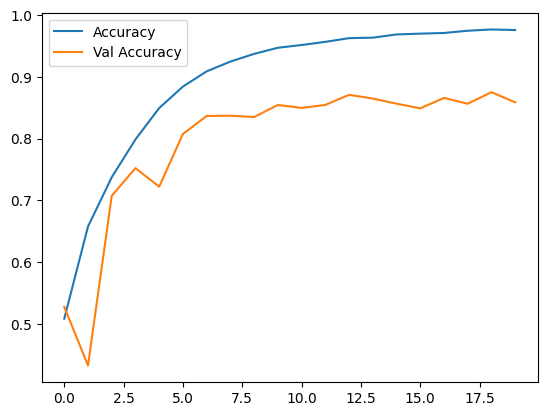

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Val Accuracy")
plt.legend();